**M1**
1. 필요한 라이브러리 import
2. book.csv 파일을 DataFrame으로 불러옴 (df, encoding='euc-kr')
3. 데이터 정상적인 import 확인, 실 데이터 내용(구조) 파악
4. 각 컬럼 정의
5. 데이터 각 컬럼별 데이터 타입과 결측치 여부 확인
6. 기초 통계량 확인
7. 'Pdatae' 컬럼의 데이터 타입을 날짜 타입으로 변환
8. 연도별 출판물 수 계산, 시각화

In [1]:
import pandas as pd
import missingno as msno

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

# 데이터 불러오기
df = pd.read_csv('book.csv', encoding='euc-kr')
# df = pd.read_csv('./book.csv', encoding='euc-kr')

# 3. 데이터 정상적인 import 확인, 실 데이터 내용(구조) 파악
# 상위 5개 행 확인
print(df.head())


   Unnamed: 0        ID Title  Rating Author Price Pdate Publisher Btype  \
0           0  97006285   NaN     NaN    NaN   NaN   NaN       NaN   new   
1           1  97006286   NaN     NaN    NaN   NaN   NaN       NaN   new   
2           2  97006287   NaN     NaN    NaN   NaN   NaN       NaN   new   
3           3  97006288   NaN     NaN    NaN   NaN   NaN       NaN   new   
4           4  97006289   NaN     NaN    NaN   NaN   NaN       NaN   new   

   Salseindex  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [2]:
print(df.tail())

       Unnamed: 0        ID         Title  Rating      Author  Price  \
33298       33298  97039591           뇌 1     NaN   베르나르 베르베르  4,950   
33299       33299  97039592  나의 문화유산답사기 6     NaN         유홍준  6,930   
33300       33300  97039593        말테의 수기     NaN  라이너 마리아 릴케  3,780   
33301       33301  97039594      다빈치 코드 1     NaN       댄 브라운  5,040   
33302       33302  97039595     밥상에 오른 과학     NaN         이성규  3,990   

               Pdate Publisher Btype  Salseindex  
33298  2006년 04월 10일      열린책들   old         NaN  
33299  2011년 05월 11일        창비   old         NaN  
33300  2005년 01월 15일       민음사   old         NaN  
33301  2013년 12월 11일      문학수첩   old         NaN  
33302  2007년 05월 20일       봄나무   old         NaN  


4. 각 컬럼 정의
    Title : 책 제목
    ....
    Pdate : 출판일

In [3]:
# 5. 데이터 각 컬럼별 데이터 타입과 결측치 여부 확인

# 데이터 정보 확인
print(df.info())

# price ???
# pdate ???

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33303 entries, 0 to 33302
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  33303 non-null  int64  
 1   ID          33303 non-null  int64  
 2   Title       25082 non-null  object 
 3   Rating      791 non-null    float64
 4   Author      21434 non-null  object 
 5   Price       22814 non-null  object 
 6   Pdate       24651 non-null  object 
 7   Publisher   24564 non-null  object 
 8   Btype       33303 non-null  object 
 9   Salseindex  812 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 2.5+ MB
None


In [4]:
# price  object => 수치형
# 'Price' 컬럼을 수치형으로 변환
df['Price'] = pd.to_numeric(df['Price'].str.replace('[^\d.]', ''), errors='coerce')

# 변환 후 데이터 타입 확인
print(df['Price'].dtypes)

# 기초 통계량 다시 확인
print(df['Price'].describe())

float64
count    2.281400e+04
mean     1.128600e+04
std      2.113542e+04
min      0.000000e+00
25%      4.050000e+03
50%      6.300000e+03
75%      1.140000e+04
max      1.042580e+06
Name: Price, dtype: float64


C:\Users\crazy\AppData\Local\Temp\ipykernel_23832\1227807614.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Price'] = pd.to_numeric(df['Price'].str.replace('[^\d.]', ''), errors='coerce')


In [5]:
# 6. 기초 통계량 확인
# 기초 통계량 확인
print(df.describe())

         Unnamed: 0            ID      Rating         Price   Salseindex
count  33303.000000  3.330300e+04  791.000000  2.281400e+04   812.000000
mean   16651.000000  9.702294e+07    9.284703  1.128600e+04   301.049261
std     9613.892344  9.616439e+03    1.135718  2.113542e+04   838.236611
min        0.000000  9.700628e+07    2.000000  0.000000e+00    12.000000
25%     8325.500000  9.701461e+07    9.000000  4.050000e+03    12.000000
50%    16651.000000  9.702294e+07    9.700000  6.300000e+03    48.000000
75%    24976.500000  9.703127e+07   10.000000  1.140000e+04   174.000000
max    33302.000000  9.703960e+07   10.000000  1.042580e+06  9393.000000


7. 'Pdatae' 컬럼의 데이터 타입을 날짜 타입으로 변환

In [6]:

# 변환 전
# print(df['Pdate'].head())
# 'Pdate' 컬럼을 날짜 타입으로 변환 (한국어 날짜 형식에 맞춤)
df['Pdate'] = pd.to_datetime(df['Pdate'], format='%Y년 %m월 %d일', errors='coerce')
# 변환 후
# print(df['Pdate'].head())

8. 연도별 출판물 수 계산, 시각화

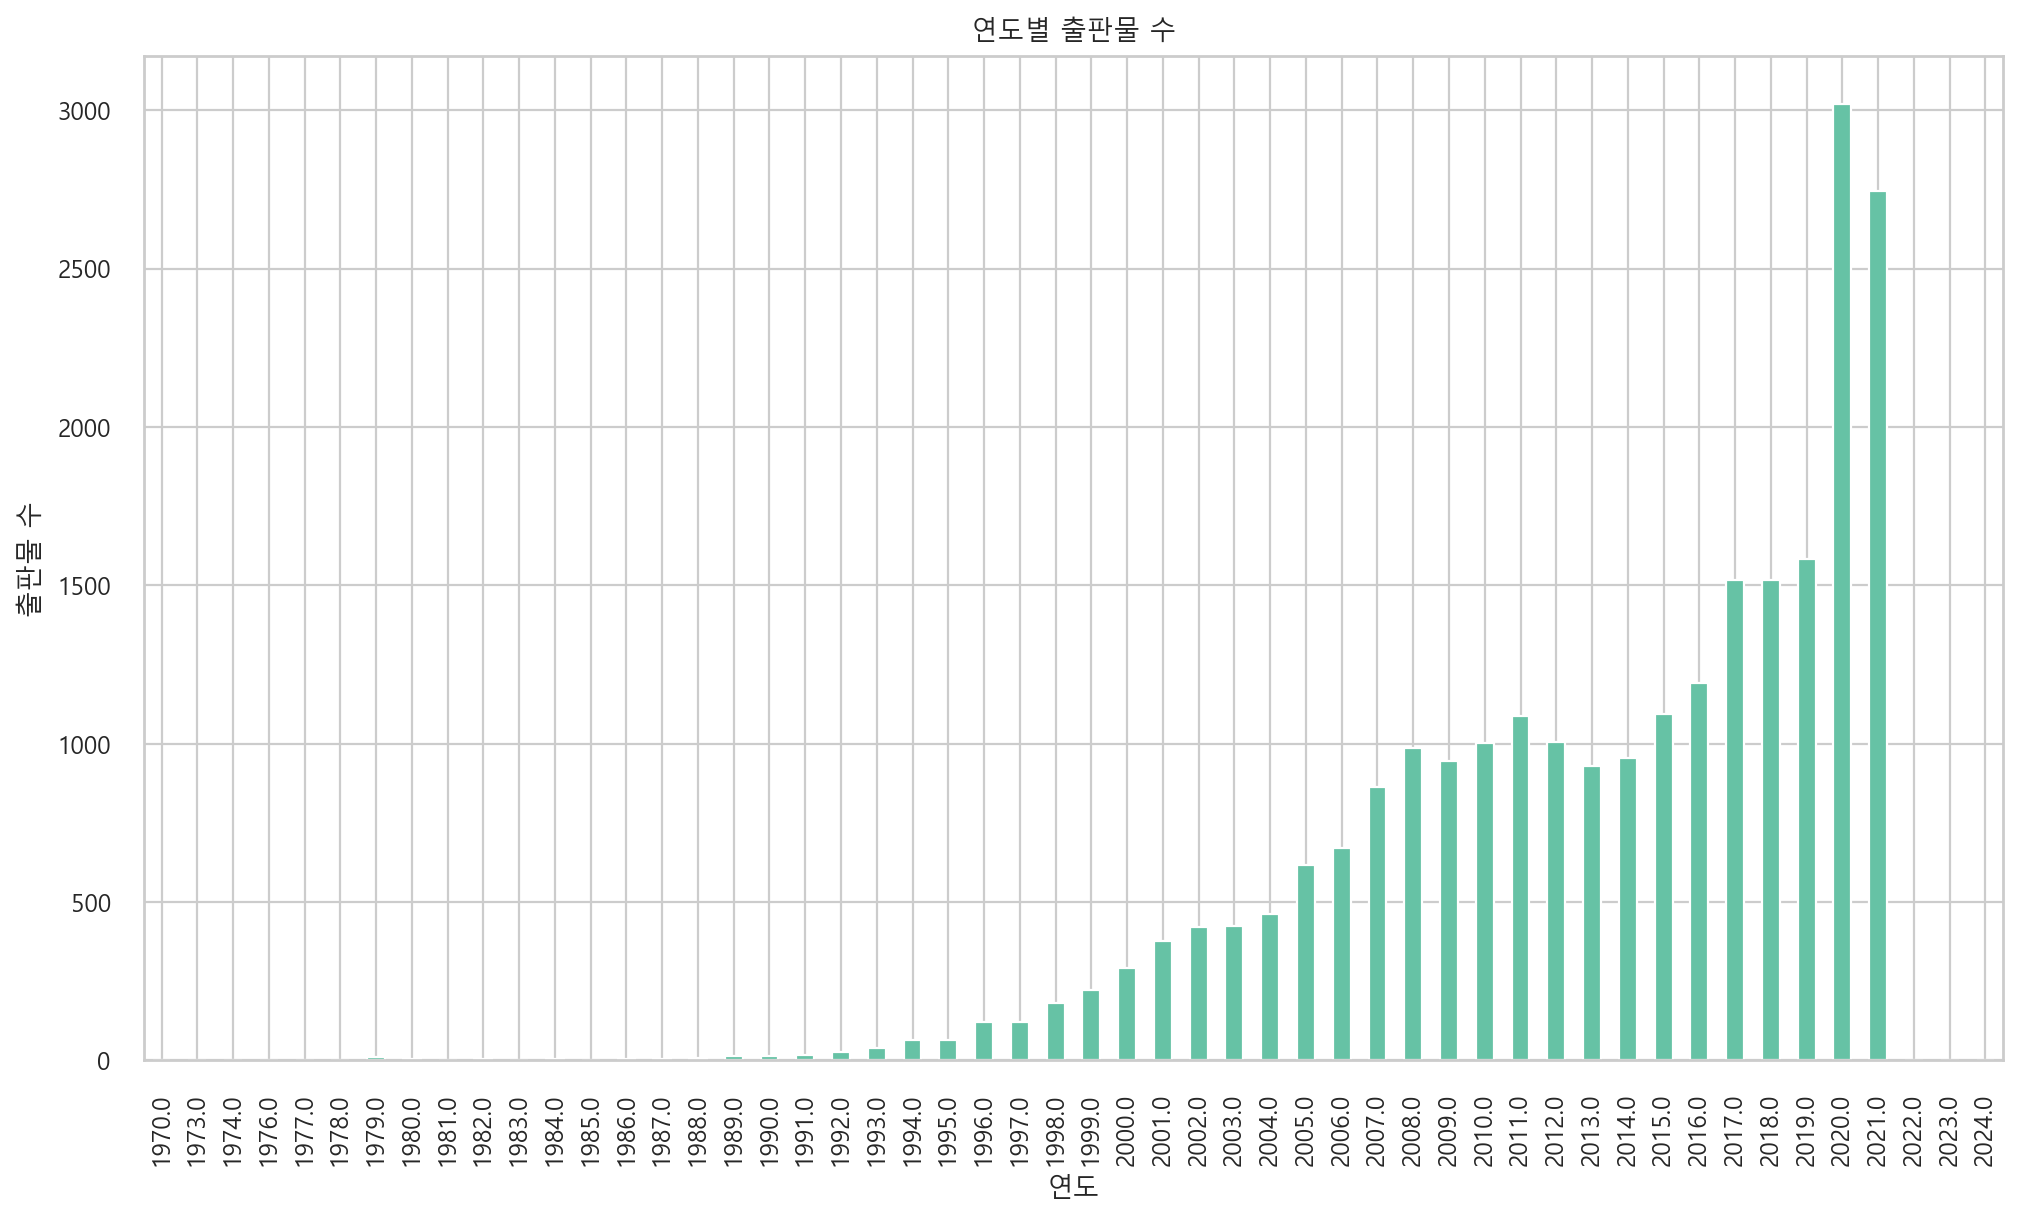

In [7]:
# 연도별로 데이터 집계
df['Year'] = df['Pdate'].dt.year
yearly_counts = df.groupby('Year').size().sort_index()

# 연도별 출판물 수 시각화
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar')
plt.title('연도별 출판물 수')
plt.xlabel('연도')
plt.ylabel('출판물 수')
plt.tight_layout()  # 레이블이 잘리지 않도록 조정
plt.show()

**M2**<br><br>
1.결측치 확인: 데이터셋에 결측치가 있는지 확인, 각 컬럼별로 결측치의 비율 계산 <br>
2.고유값 확인: 범주형 변수의 고유값과 그 개수 확인.<br>
3.상관관계 분석: 수치형 변수들 간의 상관관계를 분석.<br>
4.분포 확인: 수치형 변수의 분포를 히스토그램 or 박스 플롯 or... 확인, 분석 <br>
6.범주형 변수의 분포: 범주형 변수의 분포를 바 차트 등으로 시각화, 분포 확인, 분석 <br>
7.다변량 분석: 산점도 행렬, 페어플롯, 히트맵 등을 통해 여러 변수들 간의 관계 파악

In [8]:

# 결측치 확인
print("결측치 확인:")
print(df.isnull().sum())

# 결측치 비율 계산
print("\n결측치 비율:")
print(df.isnull().mean() * 100)


결측치 확인:
Unnamed: 0        0
ID                0
Title          8221
Rating        32512
Author        11869
Price         10489
Pdate          8652
Publisher      8739
Btype             0
Salseindex    32491
Year           8652
dtype: int64

결측치 비율:
Unnamed: 0     0.000000
ID             0.000000
Title         24.685464
Rating        97.624839
Author        35.639432
Price         31.495661
Pdate         25.979641
Publisher     26.240879
Btype          0.000000
Salseindex    97.561781
Year          25.979641
dtype: float64


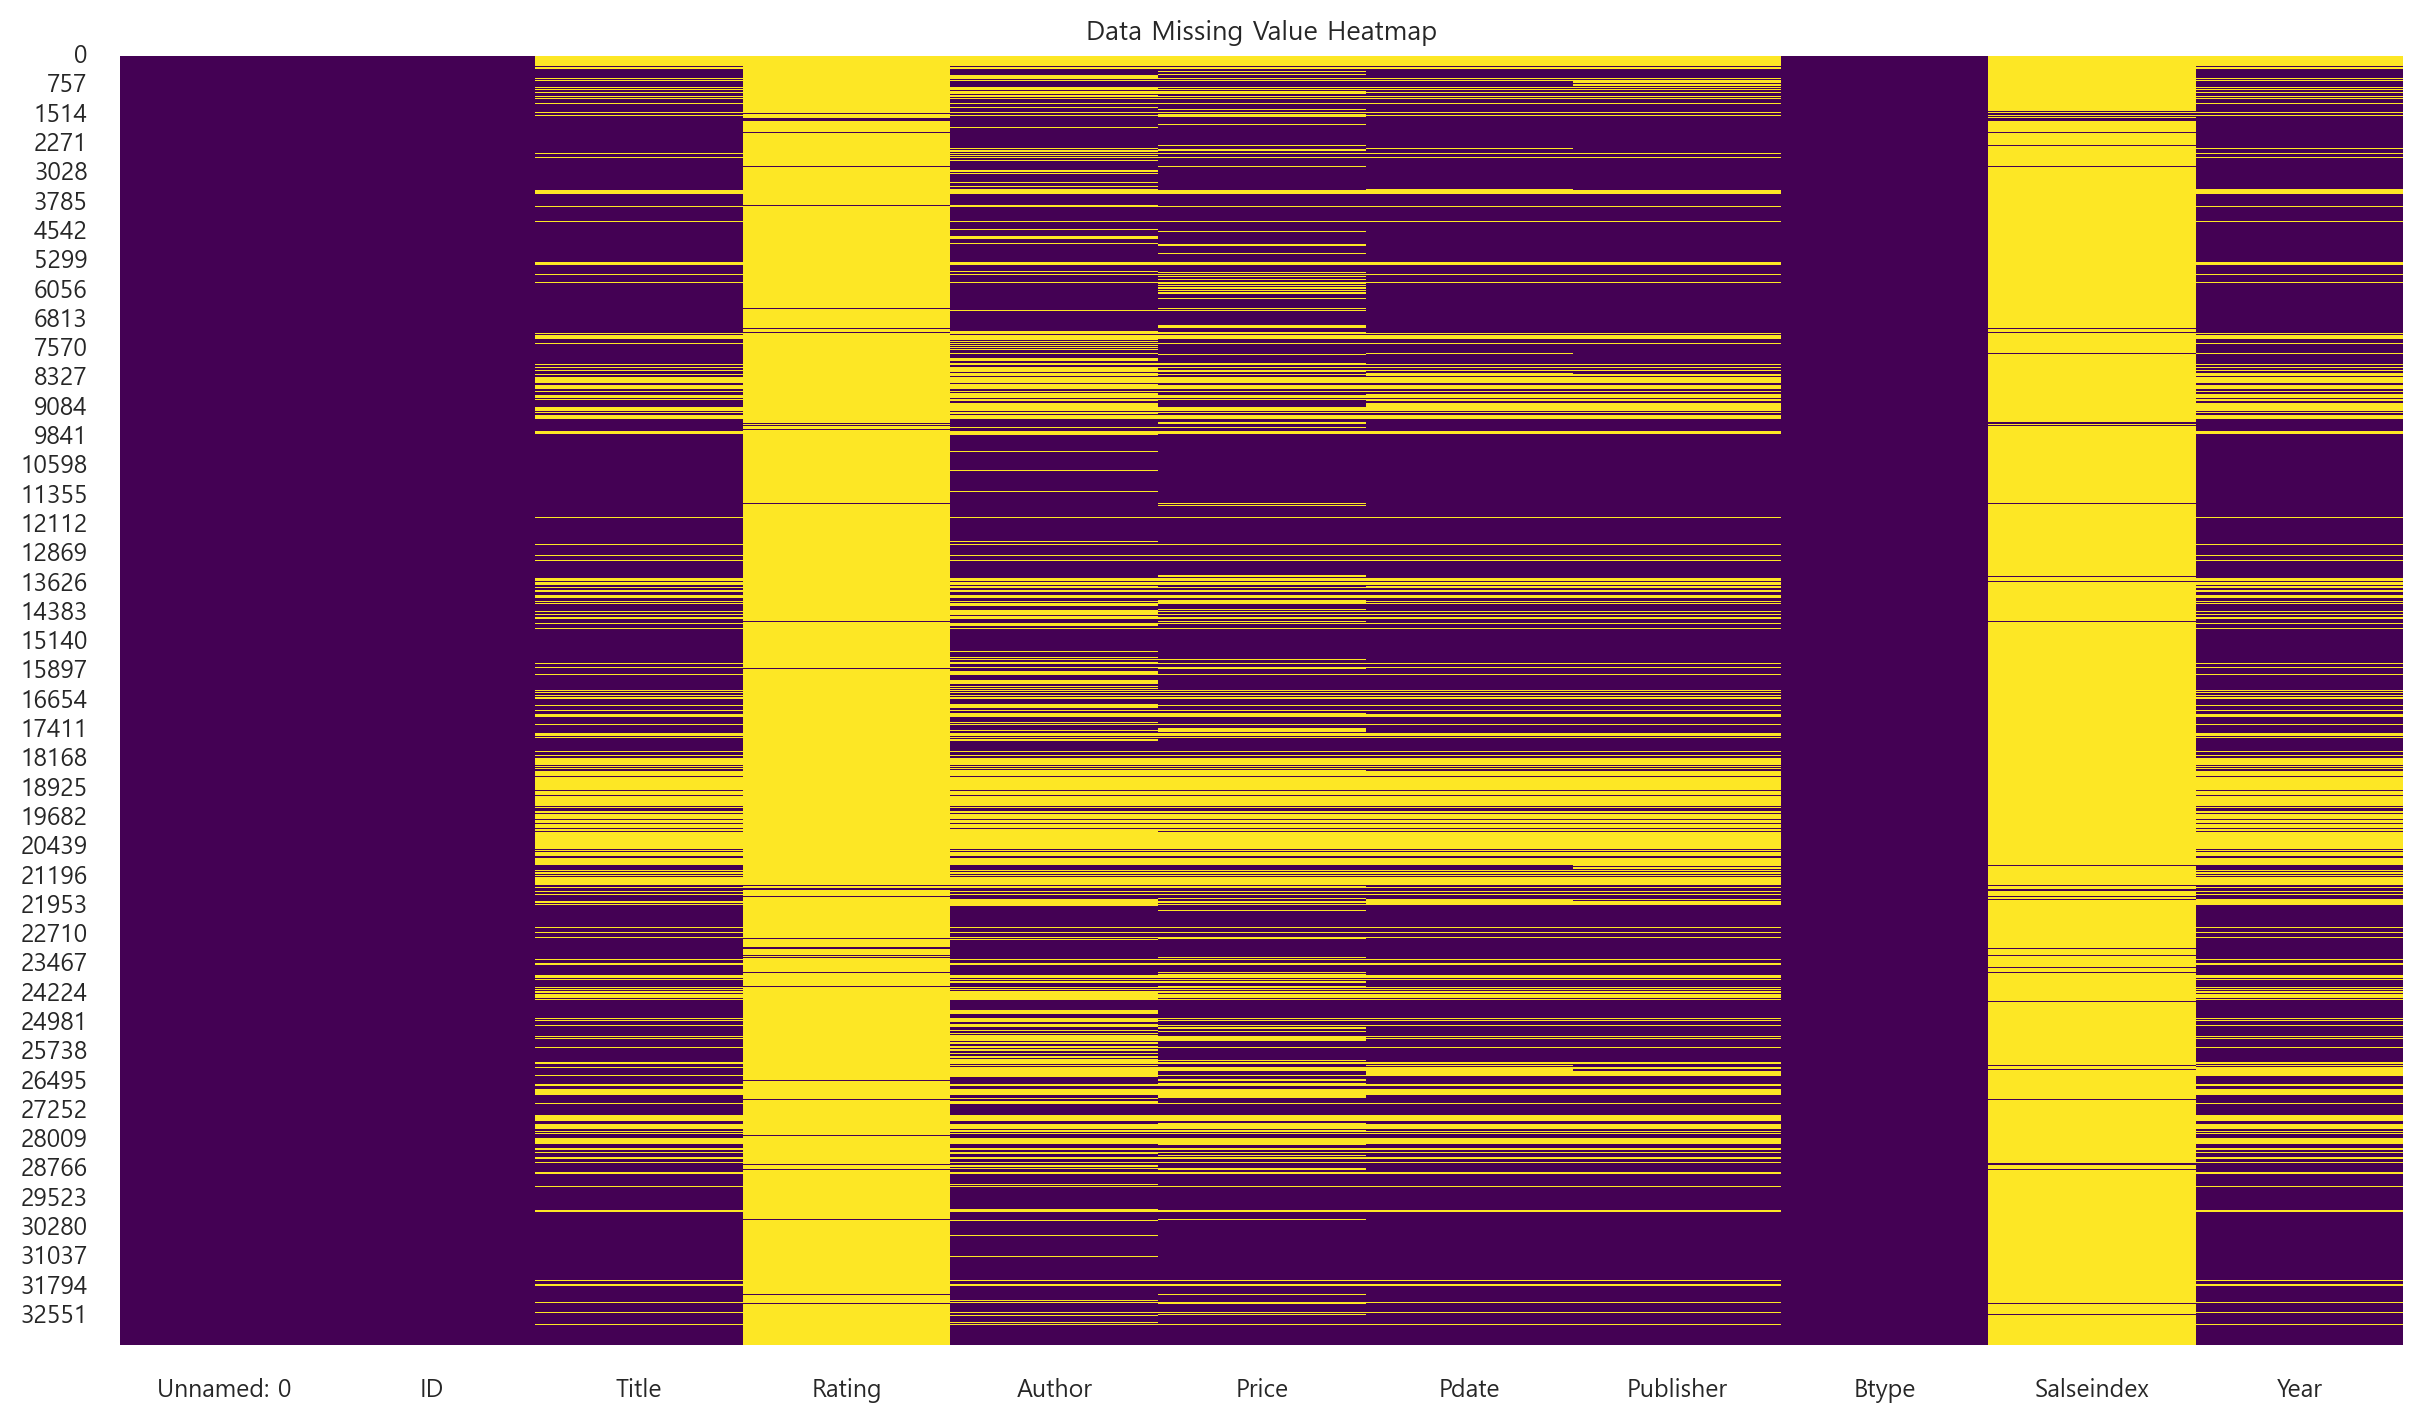

In [9]:
# 결측치 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Data Missing Value Heatmap')

# 플롯팅
plt.show()

In [10]:
# 결측치 처리
# 일반적인 방법이며, 실제 모델링 단계에서 적합한 결측치 처리 방법 적용
# 결측치 처리 - 평균값으로 대체
df.fillna(df.mean(), inplace=True)
# 결측치 처리 - 0으로
df = df.fillna(0)


# 'Rating'의 결측치를 평균값으로 대체
rating_mean = df[df['Rating'] != 'None']['Rating'].astype(float).mean()
df['Rating'] = df['Rating'].replace('None', rating_mean).astype(float)



# 'Price' 열에서 결측값 제거
df = df.dropna(subset=['Price'])

# 데이터프레임 전체에서 결측값이 있는 행을 제거
# df = df.dropna()


C:\Users\crazy\AppData\Local\Temp\ipykernel_23832\3141406067.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
C:\Users\crazy\AppData\Local\Temp\ipykernel_23832\3141406067.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [11]:

# 고유값 확인
for col in df.select_dtypes(include=['object']).columns:
    print("\n" + col + " 컬럼의 고유값 개수:")
    print(df[col].nunique())



Title 컬럼의 고유값 개수:
21624

Author 컬럼의 고유값 개수:
11667

Pdate 컬럼의 고유값 개수:
4916

Publisher 컬럼의 고유값 개수:
4035

Btype 컬럼의 고유값 개수:
2


In [12]:
# 상관관계 분석
print("\n상관관계:")
correlation_matrix = df.corr()
print(correlation_matrix)




상관관계:
            Unnamed: 0        ID    Rating     Price  Salseindex      Year
Unnamed: 0    1.000000  1.000000 -0.004120 -0.098391    0.010226 -0.031038
ID            1.000000  1.000000 -0.004121 -0.098390    0.010226 -0.031037
Rating       -0.004120 -0.004121  1.000000  0.002390    0.084346 -0.000716
Price        -0.098391 -0.098390  0.002390  1.000000    0.005226  0.106239
Salseindex    0.010226  0.010226  0.084346  0.005226    1.000000  0.005846
Year         -0.031038 -0.031037 -0.000716  0.106239    0.005846  1.000000


C:\Users\crazy\AppData\Local\Temp\ipykernel_23832\2275990141.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


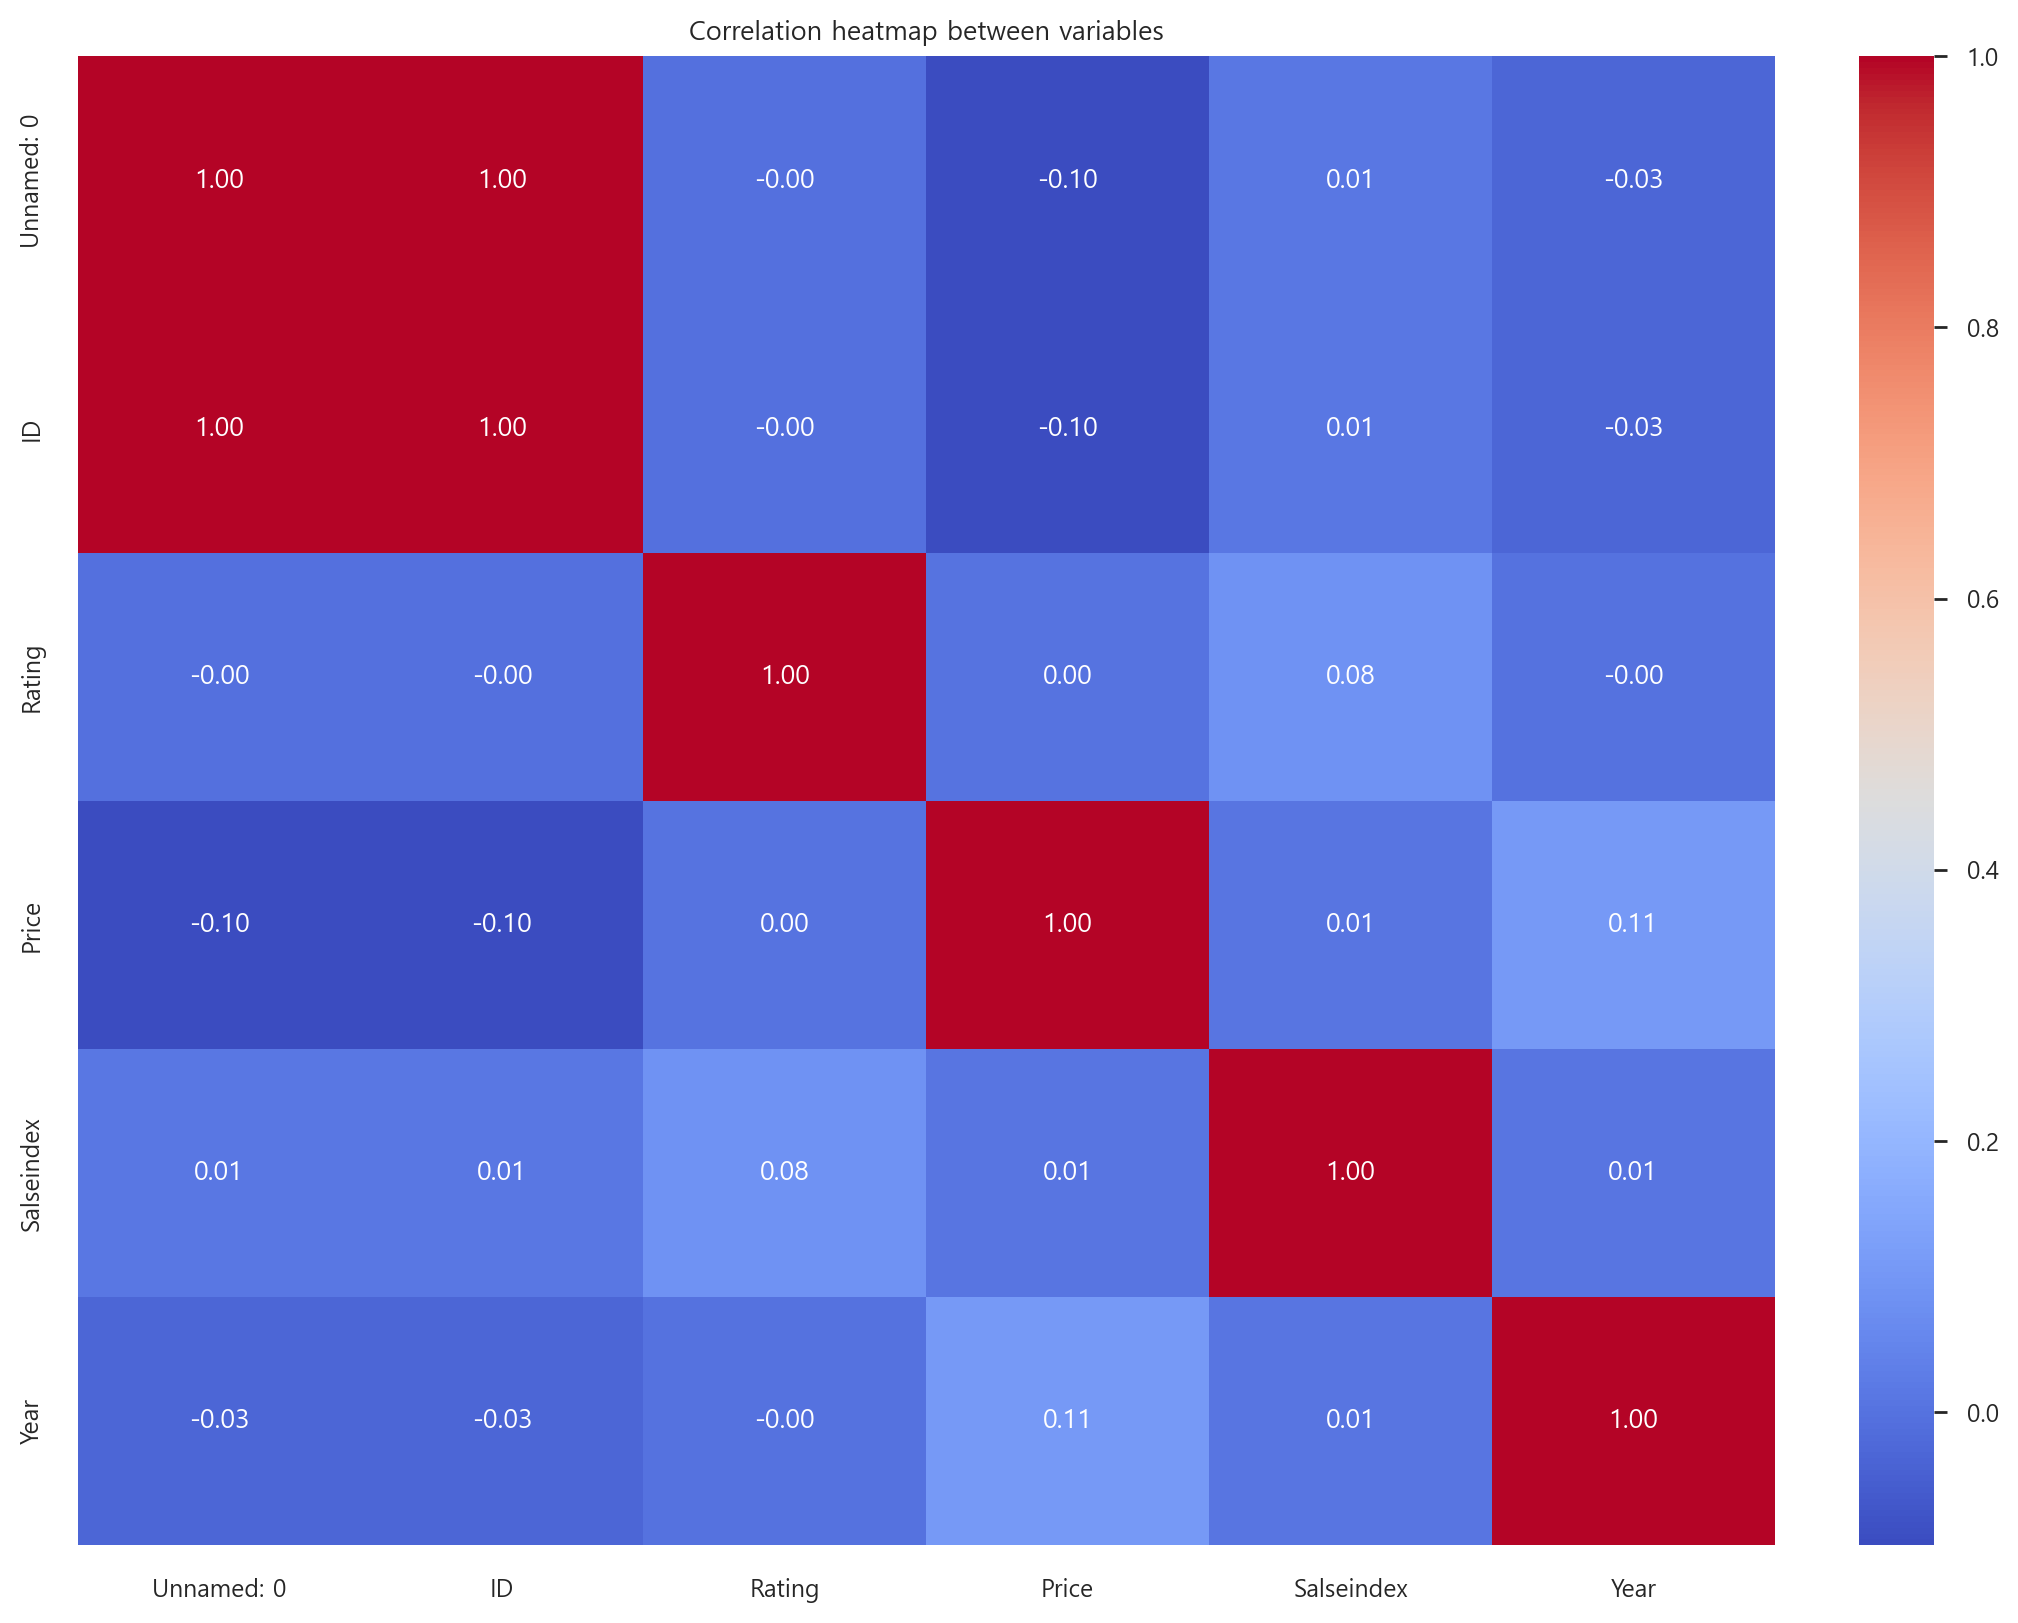

In [13]:
# 다변량 분석 - 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation heatmap between variables")
plt.show()

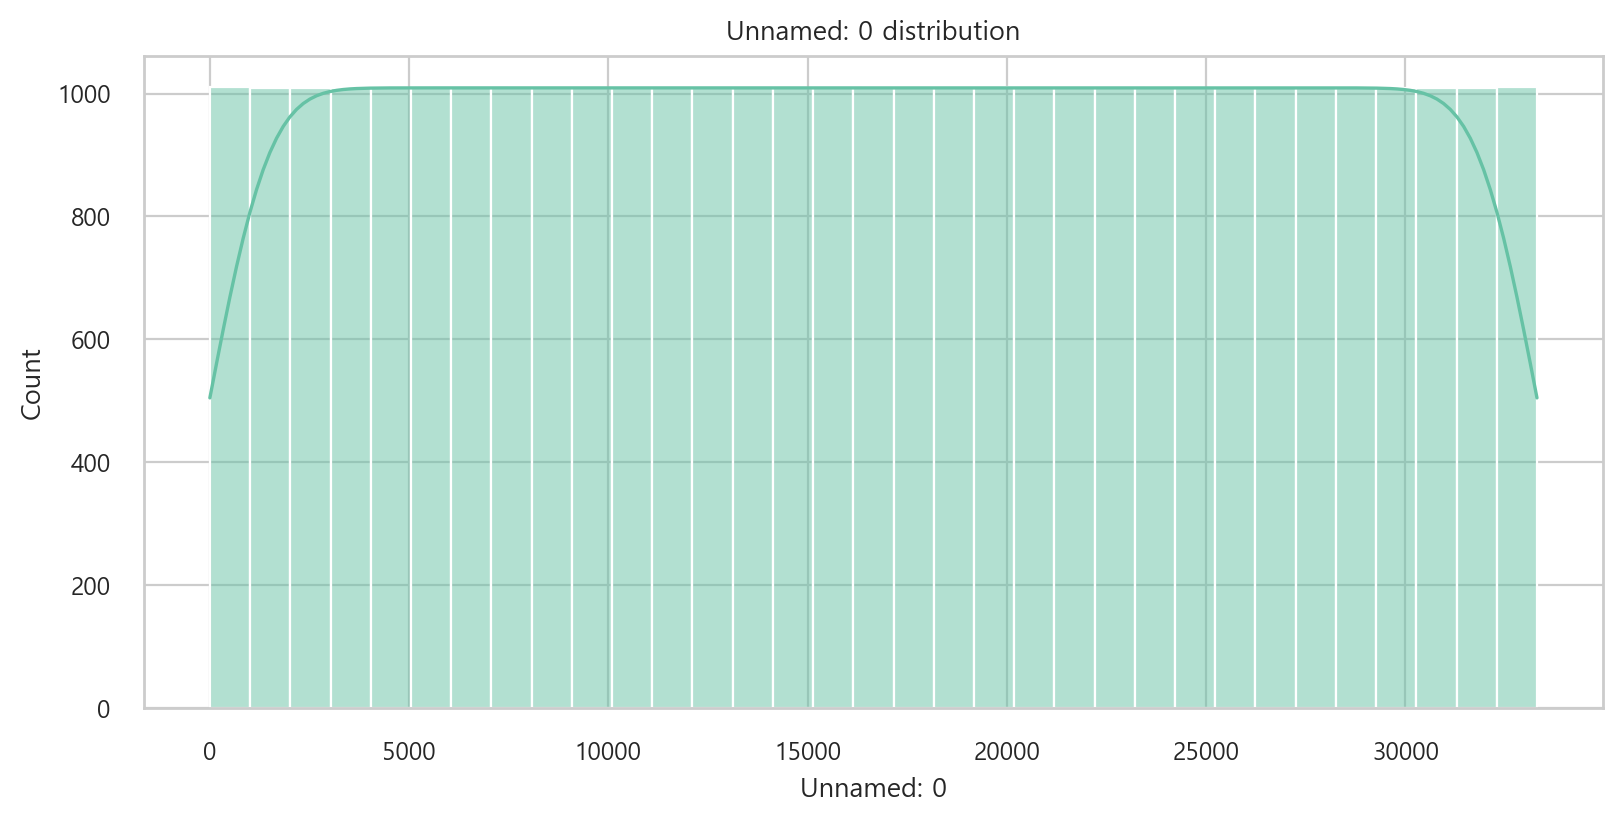

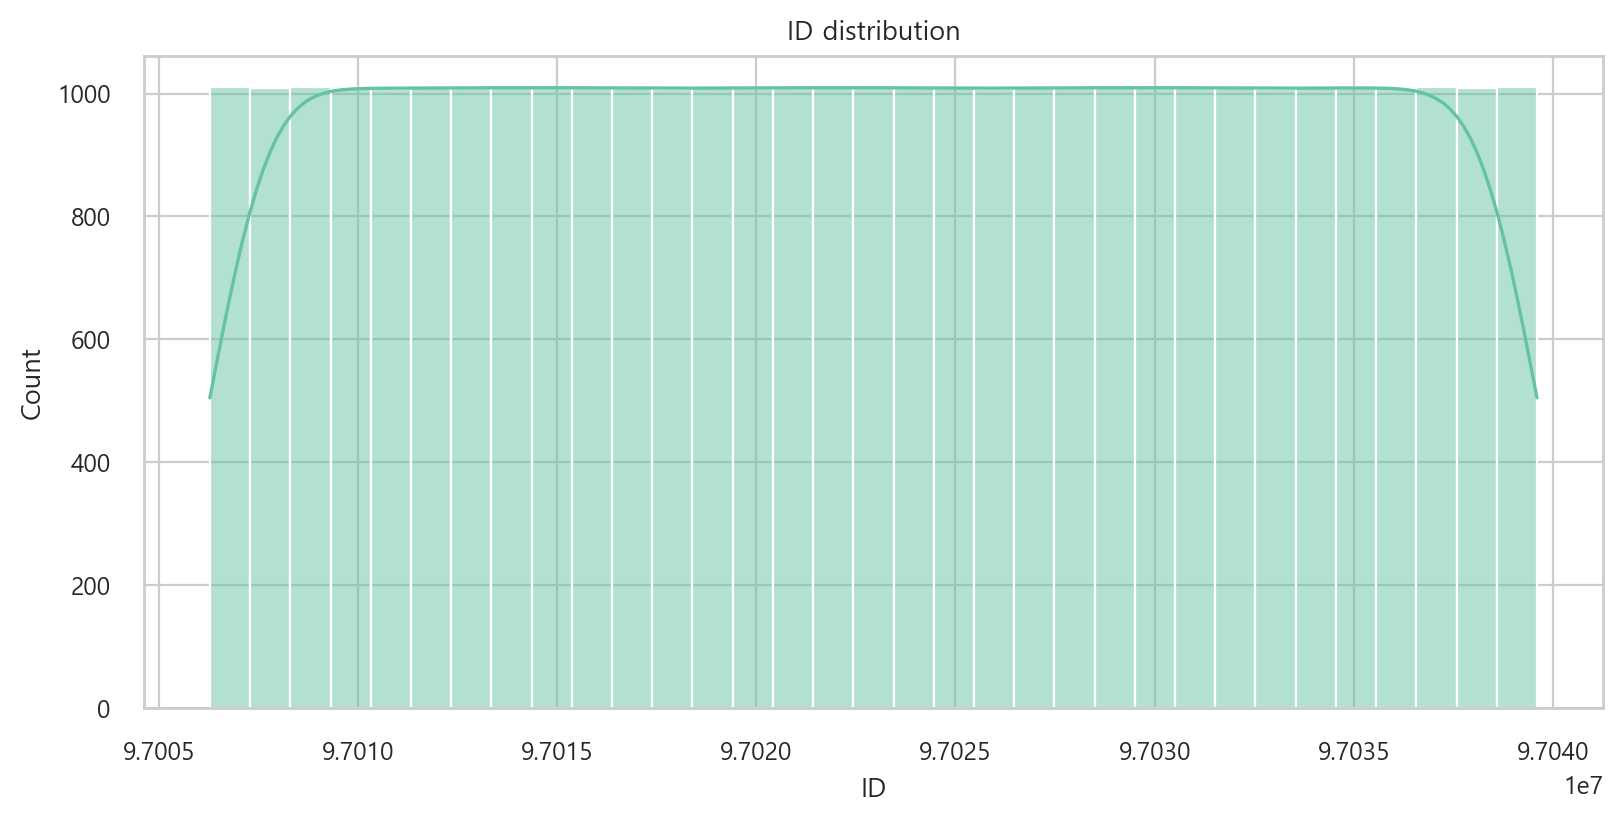

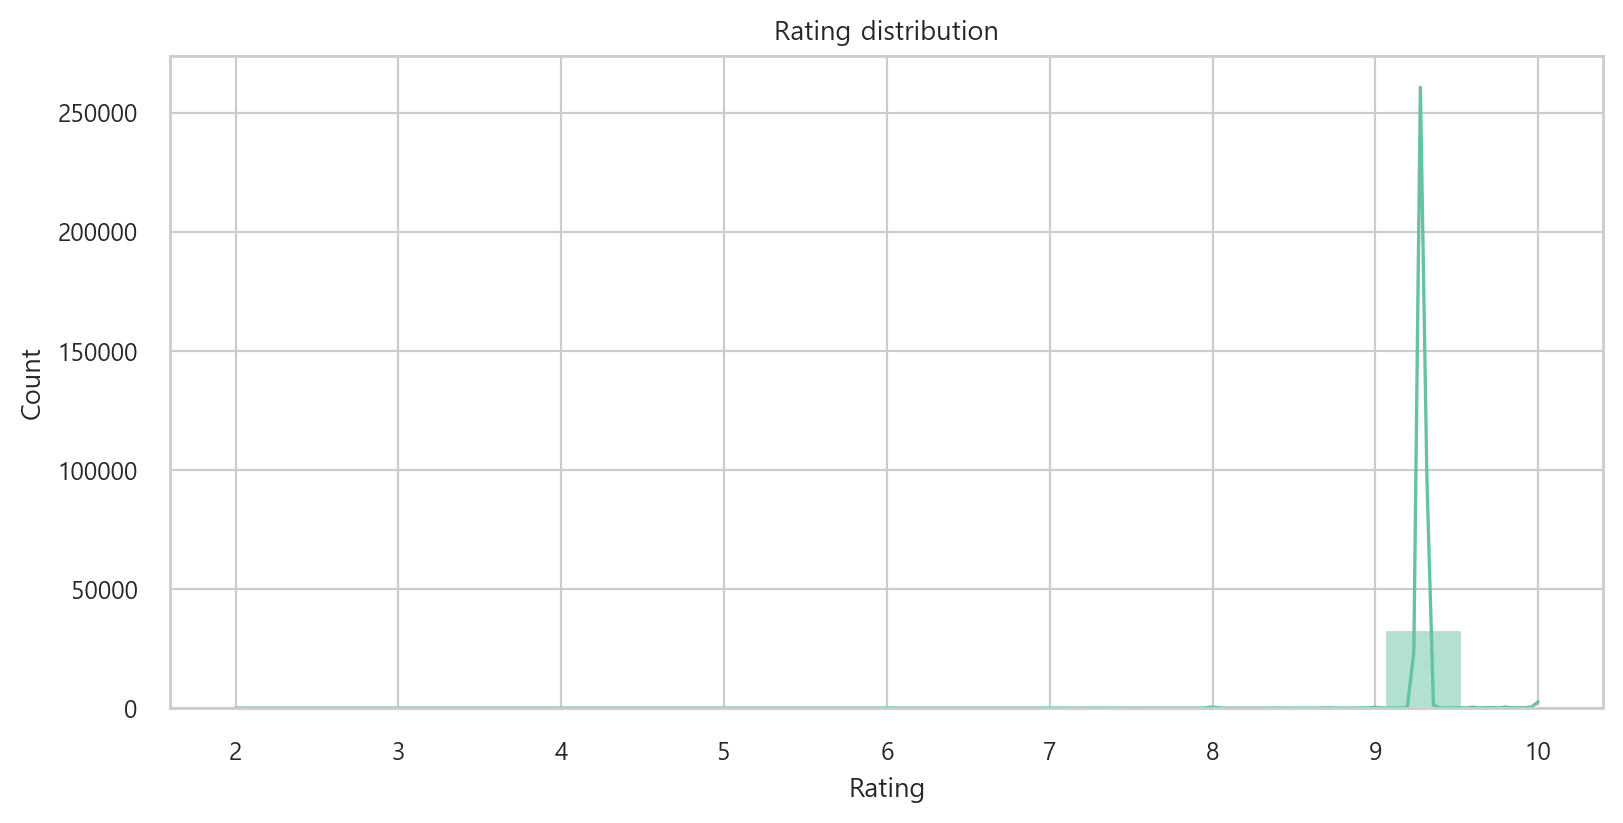

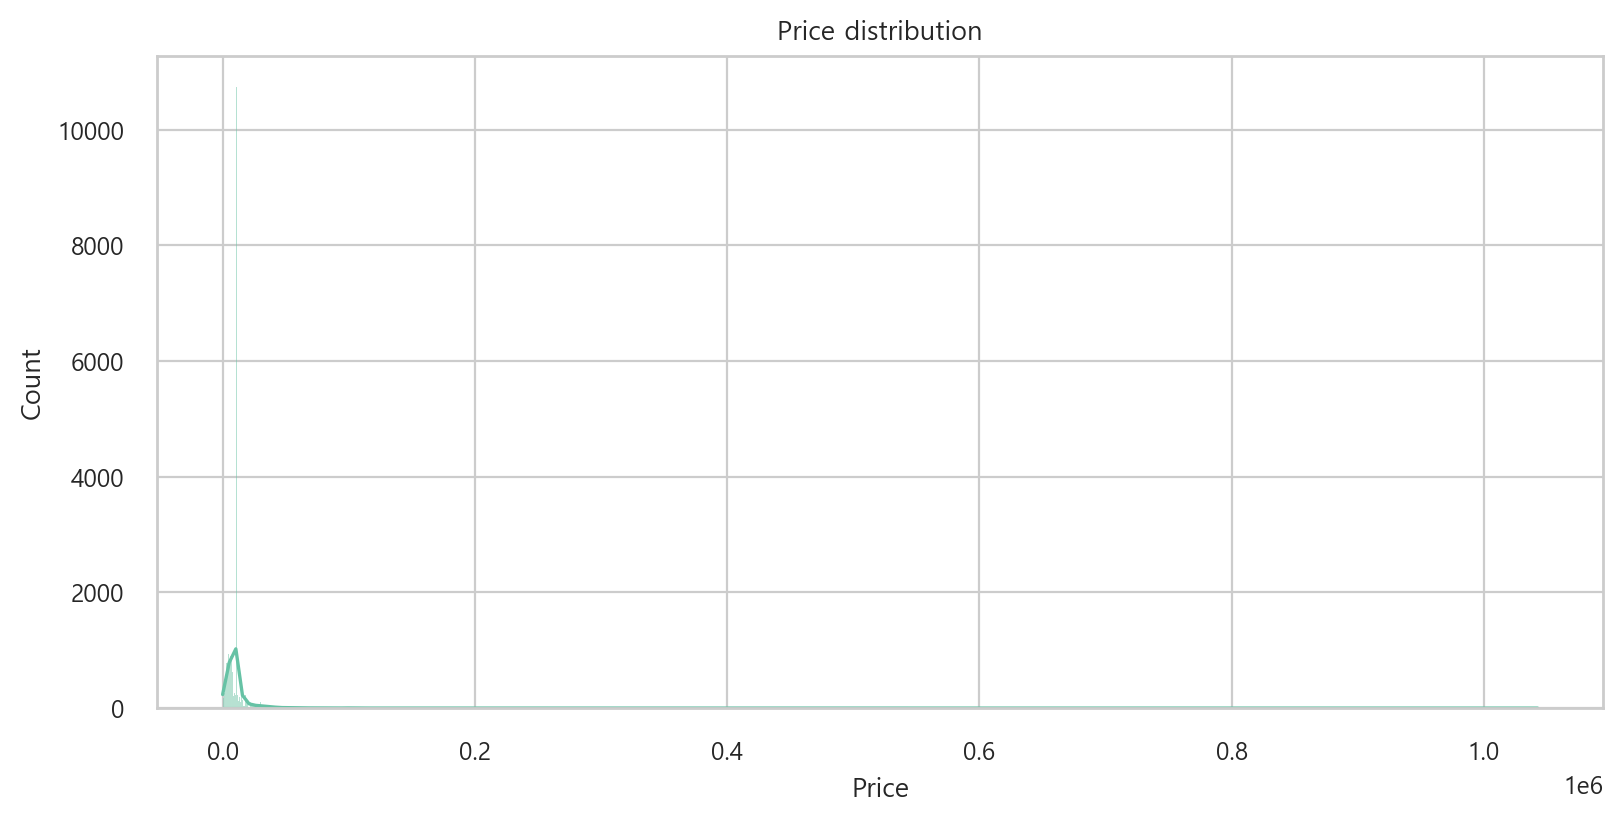

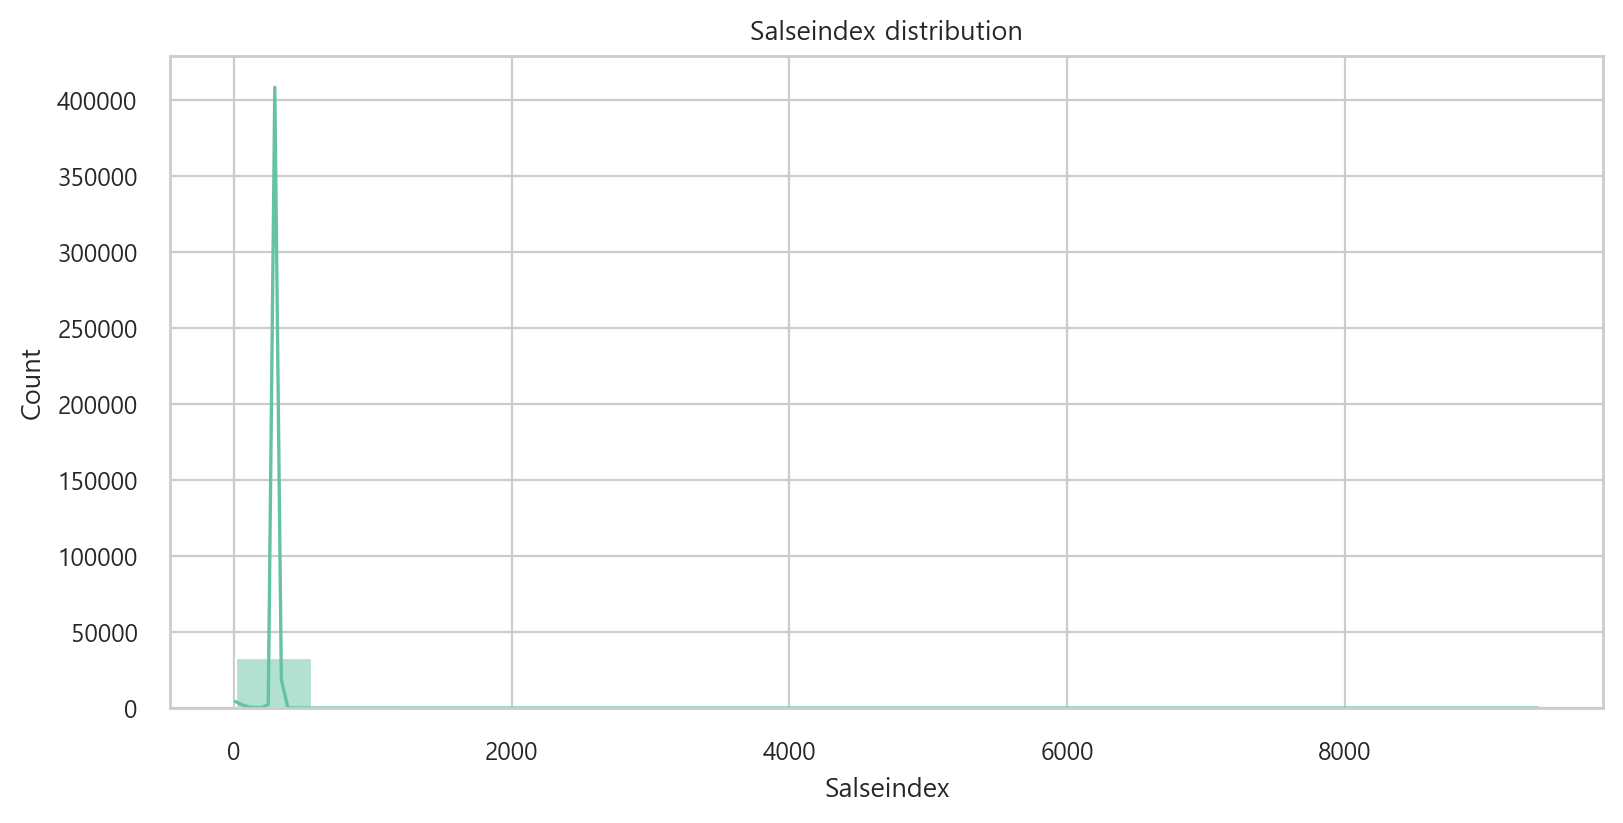

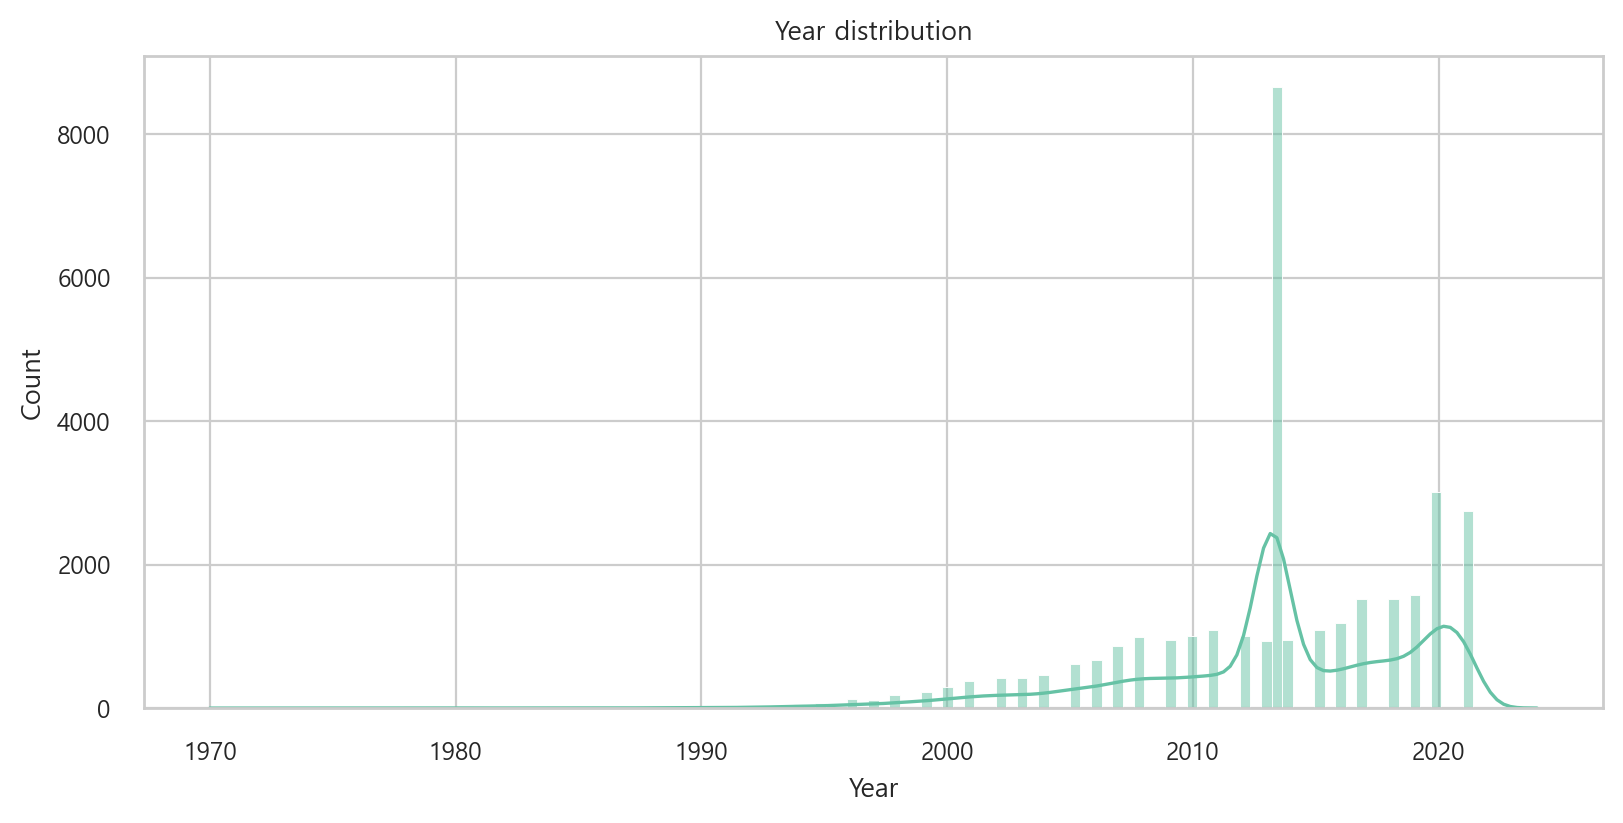

In [14]:
import seaborn as sns

# 수치형 변수 분포 확인
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(col + " distribution")
    plt.show()



In [15]:
# 범주형 변수 분포 확인 - 범주형 변수 확인
df.select_dtypes(include=['object']).columns

Index(['Title', 'Author', 'Pdate', 'Publisher', 'Btype'], dtype='object')

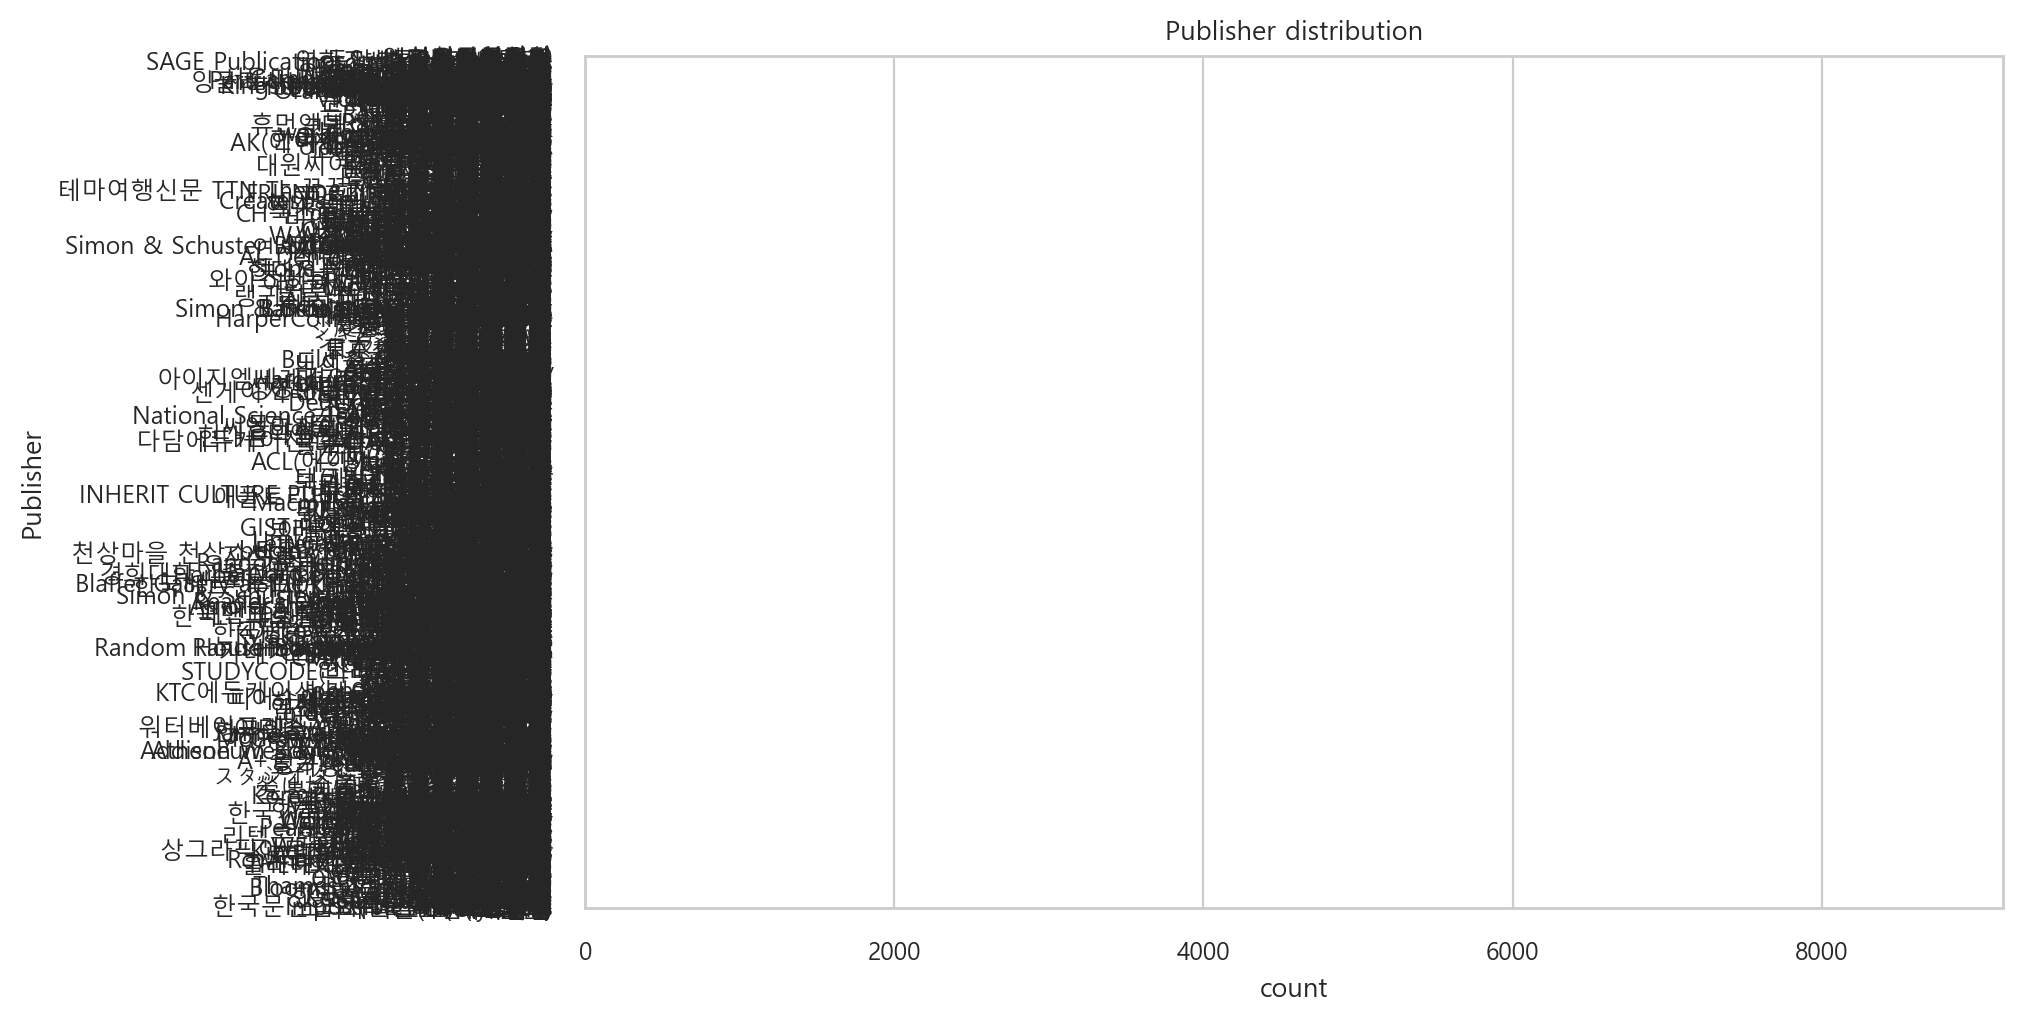

In [16]:
# 범주형 변수 분포 확인 - Publisher

plt.figure(figsize=(10, 5))
sns.countplot(y='Publisher', data=df)
plt.title('Publisher distribution')
plt.show()


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
c:\Users\crazy\miniconda3\envs\kdt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\crazy\miniconda3\envs\kdt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\crazy\miniconda3\envs\kdt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\crazy\minicon

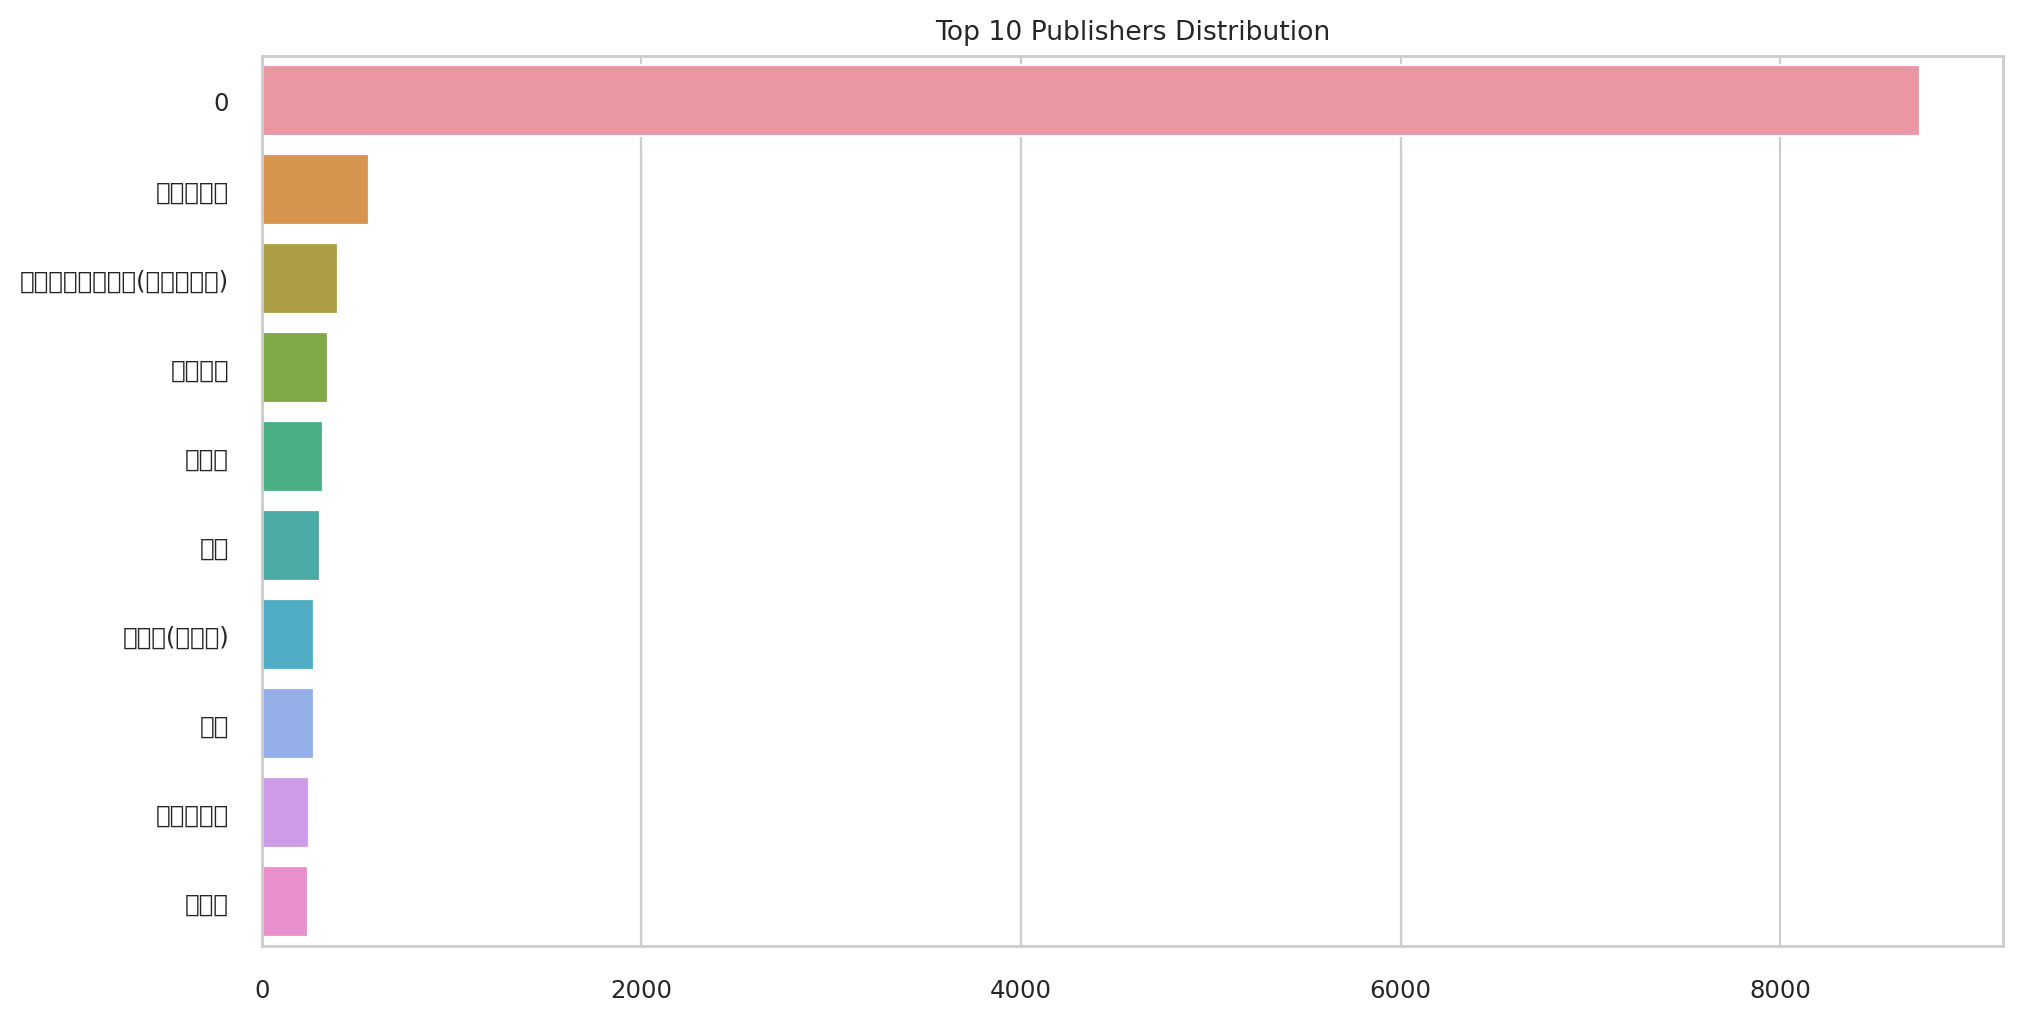

In [17]:
plt.rc('font', family='NanumBarunGothic')
# sns.set(font="Malgun Gothic",
# rc={"axes.unicode_minus":False}, style='white')


# 범주형 변수 분포 확인 - Publisher

# 가장 많이 등장하는 상위 10개의 출판사 추출
top_publishers = df['Publisher'].value_counts().head(10)

# 상위 10개의 출판사에 대한 countplot 그리기
plt.figure(figsize=(10, 5))
sns.barplot(y=top_publishers.index, x=top_publishers.values)
plt.title('Top 10 Publishers Distribution')
plt.show()


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

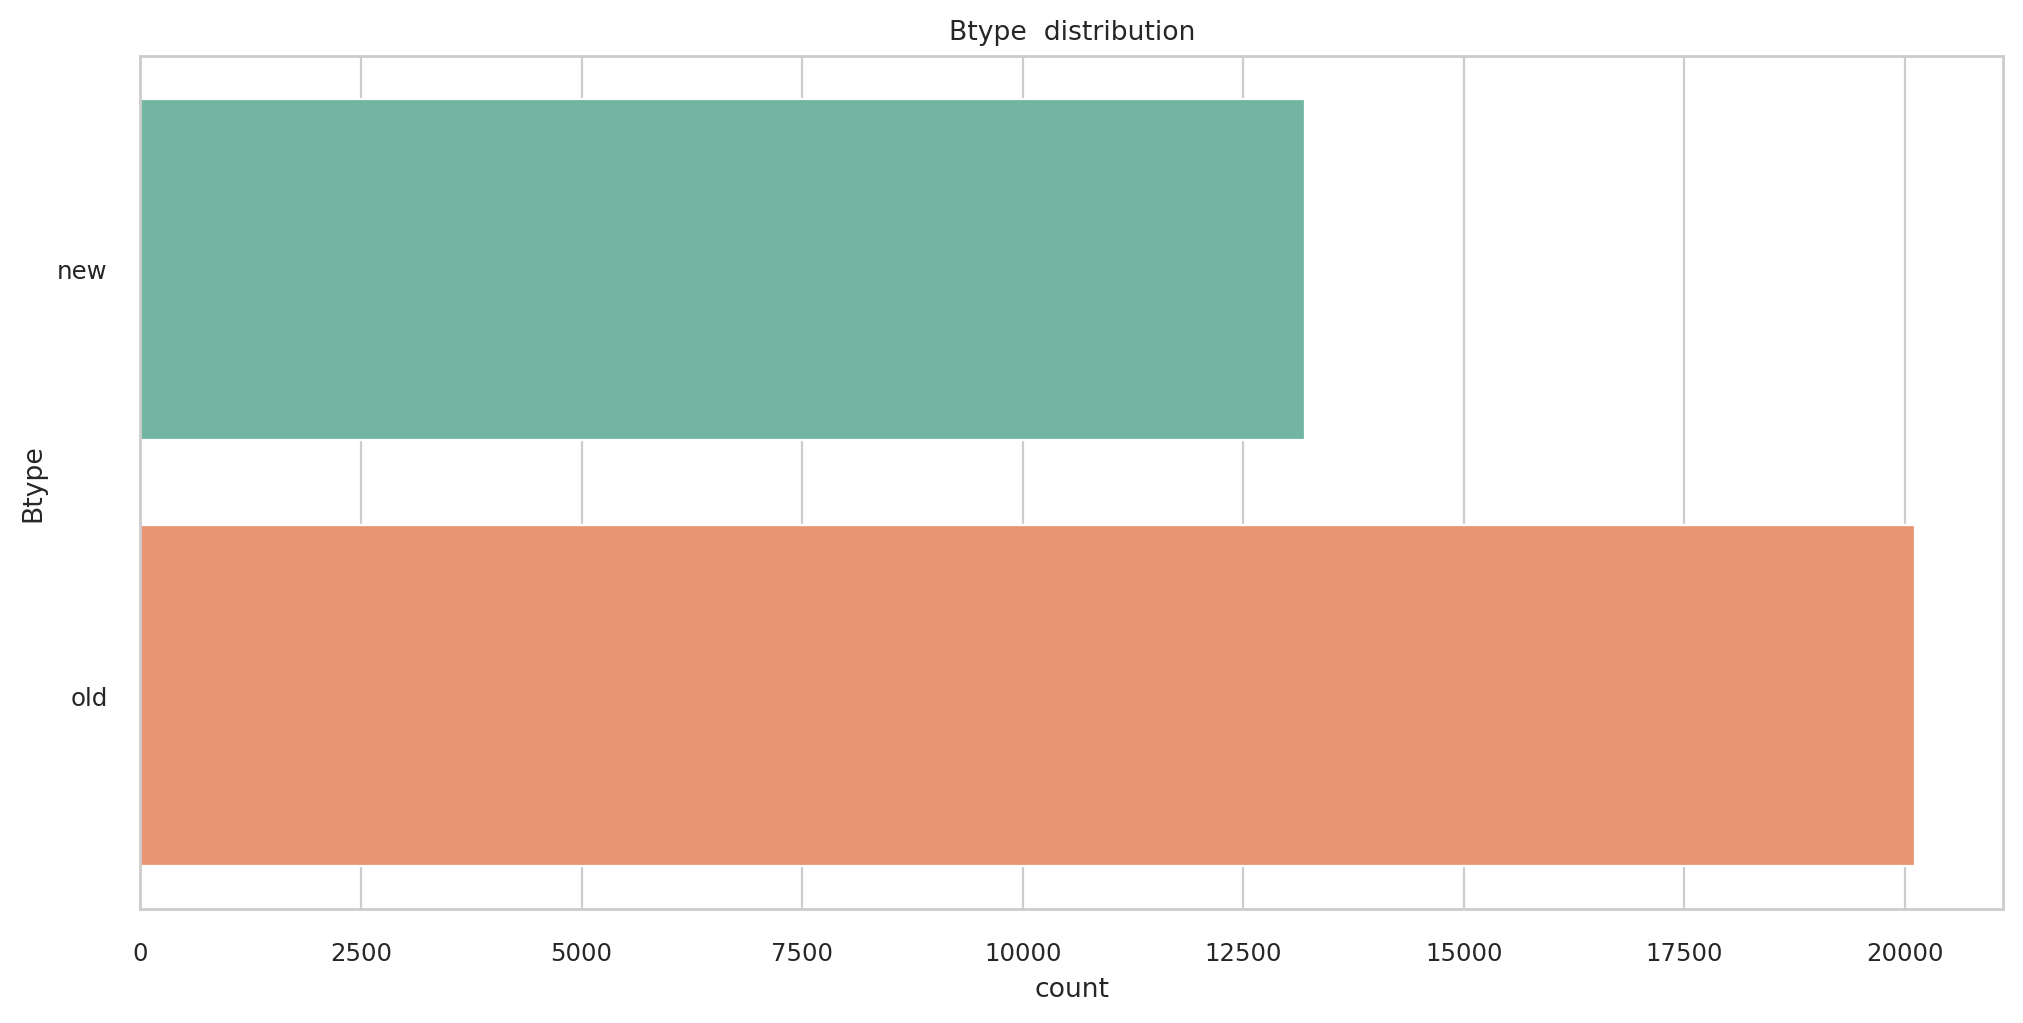

In [18]:
# 범주형 변수 분포 확인 - Btype

plt.figure(figsize=(10, 5))
sns.countplot(y='Btype', data=df)
plt.title('Btype  distribution')
plt.show()


In [19]:
# 범주형 변수 분포 확인 - 모든 변주형 범수
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=df)
    plt.title(col + " distribution")
    plt.show()


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
c:\Users\crazy\miniconda3\envs\kdt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\crazy\miniconda3\envs\kdt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52384 (\N{HANG

In [ ]:
# 다변량 분석 - 산점도 행렬
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()
